In [1]:
#Feature engineering

Length of data: 1460
Length of data_test: 1459
How many missing values in a feature: 
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64
Pairwise correlations between the features: 
               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.229823 -0.201730     0.033638    -0.065625   
LotFrontage     -0.229823     1.000000  0.135246     0.132635    -0.036252   
LotArea         -0.201730     0.135246  1.000000     0.100541    -0.035617   
OverallQual      0.033638     0.132635  0.100541     1.000000    -0.093847   
OverallCond     -0.065625    -0.036252 -0.0356

Int64Index([523, 1298, 1089], dtype='int64')
[523, 1298, 203, 217, 510, 514, 577, 807, 831, 834, 879, 1089, 1138, 1170]
(2915, 79)


<ipython-input-2-4b4be4fd03f4>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[column] = le.fit_transform(data_train[column])


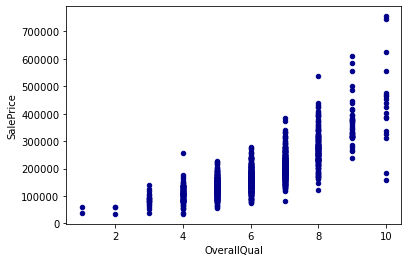

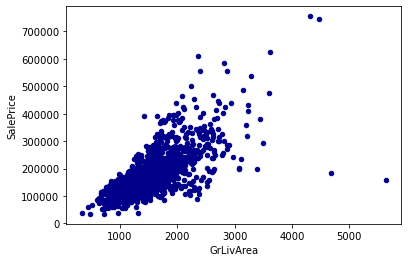

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from scipy.stats import norm, skew

data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data = data.drop('Id', axis=1)
data_test = data_test.drop('Id', axis=1)

print("Length of data: " + str(len(data)))
print("Length of data_test: " + str(len(data_test)))

data_train = pd.concat([data, data_test])

print("How many missing values in a feature: ")
print(data_train.isnull().sum().sort_values(ascending = False).head(20))

#Fixing missing values by replacing them with values from the data documentation

data_train['PoolQC'] = data_train['PoolQC'].fillna(value = 'No Pool')
data_train['MiscFeature'] = data_train['MiscFeature'].fillna(value = 'None')
data_train['Alley'] = data_train['Alley'].fillna(value = 'No alley access')
data_train['Fence'] = data_train['Fence'].fillna(value = 'No fence')
data_train['FireplaceQu'] = data_train['FireplaceQu'].fillna(value = 'No Fireplace')
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(value =0)
data_train['GarageType'] = data_train['GarageType'].fillna(value = 'None')
data_train['GarageCond'] = data_train['GarageCond'].fillna(value = 'None')
data_train['GarageFinish'] = data_train['GarageFinish'].fillna(value = 'None')
data_train['GarageQual'] = data_train['GarageQual'].fillna(value = 'None')
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(data_train['GarageYrBlt'].mean())
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna(value = 'None')
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna(value = 'None')
data_train['BsmtQual'] = data_train['BsmtQual'].fillna(value = 'None')
data_train['BsmtCond'] = data_train['BsmtCond'].fillna(value = 'None')
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].fillna(value = 'None')
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(value = 0)
data_train['MasVnrType'] = data_train['MasVnrType'].fillna(value = 'None')
data_train['Electrical'] = data_train['Electrical'].fillna(value = 'None')
data_train['MSZoning'] = data_train['MSZoning'].fillna(value = 'None')
data_train['Exterior1st'] = data_train['Exterior1st'].fillna(value = 'None')
data_train['Exterior2nd'] = data_train['Exterior2nd'].fillna(value = 'None')
data_train['KitchenQual'] = data_train['KitchenQual'].fillna(value = 'None')
data_train['Functional'] = data_train['Functional'].fillna(value = 'None')
data_train['SaleType'] = data_train['SaleType'].fillna(value = 'None')
data_train['BsmtFinSF1'] = data_train['BsmtFinSF1'].fillna(value = 0)
data_train['BsmtFinSF2'] = data_train['BsmtFinSF2'].fillna(value = 0)
data_train['BsmtUnfSF'] = data_train['BsmtUnfSF'].fillna(value = 0)
data_train['TotalBsmtSF'] = data_train['TotalBsmtSF'].fillna(value = 0)
data_train['BsmtFullBath'] = data_train['BsmtFullBath'].fillna(value = 0)
data_train['BsmtHalfBath'] = data_train['BsmtHalfBath'].fillna(value = 0)
data_train['GarageCars'] = data_train['GarageCars'].fillna(value = 0)
data_train['GarageArea'] = data_train['GarageArea'].fillna(value = 0)


#print(data_train['Utilities'].unique())
#Since this column is filled with the same value, then it is not important for us and will be dropped
data_train = data_train.drop(['Utilities'], axis=1)

#print(data_train.isnull().sum().sort_values(ascending = False).head(20))

#for col in data_train:
    #print(col)
    #print(data_train[col].value_counts())

#Dealing with outliers in features with high relevancy

correlations = data_train.corr()

print("Pairwise correlations between the features: ")
print(correlations)

#Finding features with high correlation with SalePrice
for el in correlations['SalePrice']:
    if(el>0.7):
        print(el)

#OverAllQuality
#GrLivArea

#Plotting the features with high correlation on a scatter plot to spot outliers
ax1 = data_train.plot.scatter(x='OverallQual',
                      y='SalePrice',
                      c='DarkBlue')

ax2 = data_train.plot.scatter(x='GrLivArea',
                      y='SalePrice',
                      c='DarkBlue')

#Finding the index of the outlier
indexNames = data_train[data_train['GrLivArea'] > 4600 ].index
indexNames2 = data_train[data_train['OverallQual'] == 10].index
overAllQualityIndex = []
for index in indexNames2:
    if(data_train.iloc[index,:]['SalePrice']<230000):
        overAllQualityIndex.append(index)
print(indexNames)
print(overAllQualityIndex )
##Dropping the rows with the outliers
data_train = data_train.drop([523, 1298])
#print(data_train['BsmtCond'].unique())

le = preprocessing.LabelEncoder()


#Tranforming categorical values to numerical
#print(data_train.select_dtypes(include=['object']))
for column in data_train.select_dtypes(include=['object']):
    #print(data_train[column])
    data_train[column] = le.fit_transform(data_train[column])

#get_dummies
data_dum = pd.get_dummies(data_train)
print(data_dum.shape)
#Training classifiers
train = data_dum.iloc[:1456,:]
test = data_dum.iloc[1456:,:]


#for col in test:
    #print(col)
    #print(test[col].unique())

del test['SalePrice']

#print(test)

test.fillna(0)

X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']    

In [3]:
#Classifiers and prediction:

In [4]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

rf = RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0).fit(X_train, y_train)

lasso = linear_model.Lasso(alpha = 0.0005, random_state = 1).fit(X_train, y_train)

GBoost = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.02,max_depth=8, max_features='sqrt',min_samples_leaf=15, min_samples_split=10,loss='huber', random_state =1).fit(X_train, y_train)
ENet = ElasticNet(alpha=0.0005, l1_ratio=.85, random_state=2).fit(X_train, y_train)
rf_f_importance = rf.feature_importances_
gb_f_importance = GBoost.feature_importances_
#enet_f_importance = ENet.feature_importances_

y_pred= GBoost.predict(test)

rf_pred = rf.predict(test)
enet_pred = ENet.predict(test)
lasso_pred = lasso.predict(test)

columns_titles = ["id","SalePrice"]
prediction = pd.DataFrame(data=y_pred)
prediction = prediction.rename(columns={0 : 'SalePrice'})
prediction["id"] = prediction.index+1461
prediction=prediction.reindex(columns=columns_titles)
prediction.to_csv(r'sample_submission.csv', index = False)

C:\Users\Kasutaja\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363853567415.61304, tolerance: 920483137.9096215
  model = cd_fast.enet_coordinate_descent(


In [5]:
#Feature importances

             importance
GrLivArea      0.067156
OverallQual    0.050177
GarageArea     0.039189
1stFlrSF       0.039108
TotalBsmtSF    0.037169
FullBath       0.035949
LotArea        0.032420
KitchenQual    0.032079
YearBuilt      0.029114
2ndFlrSF       0.027368
              importance
OverallQual     0.132372
GrLivArea       0.083450
YearBuilt       0.072252
TotalBsmtSF     0.060517
GarageArea      0.048504
ExterQual       0.047337
KitchenQual     0.042498
1stFlrSF        0.041129
GarageCars      0.040005
YearRemodAdd    0.034562
    GBoost mean  RandomForest mean  Elastic Net mean     LASSO mean
0  178876.83107      158347.199452     179236.343545  179236.784813


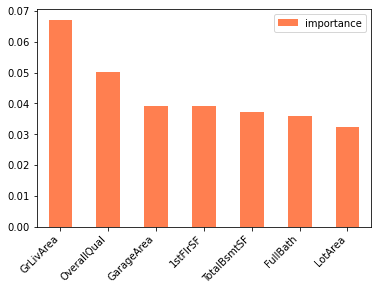

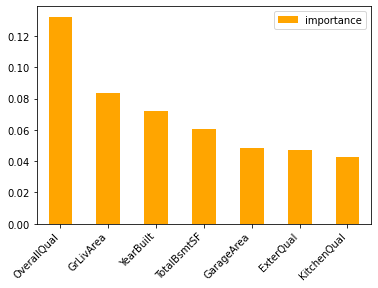

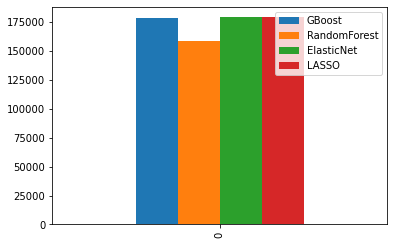

,Classifier name,Accuracy%
1,GBoost,65.475
0,RandomForest,62.755
2,ElasticNet,60.793
3,LASSO,50.072


In [6]:
import matplotlib.pyplot as plt

featureimportances1 = pd.DataFrame(rf_f_importance,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
featureimportances2 = pd.DataFrame(gb_f_importance,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(featureimportances1.head(10))
print(featureimportances2.head(10))

f_i_toplot_rf= featureimportances1.iloc[:7,:]
f_i_toplot_gb= featureimportances2.iloc[:7,:]

f_i_toplot_rf.plot(kind="bar",color="coral")
plt.xticks(rotation=45, horizontalalignment="right")
f_i_toplot_gb.plot(kind="bar",color="orange")
plt.xticks(rotation=45, horizontalalignment="right")

gb_mean = y_pred.mean()
rf_mean = rf_pred.mean()
enet_mean = enet_pred.mean()
lasso_mean = lasso_pred.mean()

data = {'GBoost mean': [gb_mean], 'RandomForest mean' :[rf_mean], "Elastic Net mean": [enet_mean], "LASSO mean": [lasso_mean]} 
means = pd.DataFrame.from_dict(data)

print(means)
ax =means.plot(kind="bar")
a=ax.get_xticks().tolist()
a[0] = "Predicted mean price"

plt.legend(["GBoost","RandomForest", "ElasticNet", "LASSO"])
plt.show()


#Table of accuracys
#The accuracys were taken from the Kaggle competition submission scores
rf_acc= (1-0.37245)*100
gb_acc= (1-0.34525)*100
enet_acc = (1-0.39207)*100
lasso_acc = (1-0.49928)*100

acc_data = [["RandomForest", rf_acc],["GBoost",gb_acc],["ElasticNet",enet_acc],["LASSO",lasso_acc]]

acc_df = pd.DataFrame(acc_data, columns = ["Classifier name", "Accuracy%"]).sort_values(by="Accuracy%", ascending=False)
acc_df

